# Introduction to Least Squares Fitting
---
GENERAL PROBLEM: Given $N$ experimental data points $(x_{0},y_{0}),\ldots,(x_{N-1},y_{N-1})$, what is the "best fit" curve that best describes the data? Because the data are assumed to have uncertainties associated with them, the best fit curve is not expected to pass through any of the data points themselves. (For this reason, interpolation is not an appropriate solution.)

IDEA: make a parameterized guess for the best fit curve. Then find the optimal choice of parameters that minimizes some statistical measure of the mismatch between the fit and data. (I.e., make a model, then optimize the model to the data)

PRE-REQUISITES:
- [None]

REFERENCES:
- Garcia, *Numerical Methods for Physicists, 2nd edition*
- Hildebrand, *Introduction to Numerical Analysis, 2nd edition*
- Bevington and Robinson, *Data Reduction and Error Analysis for the Physical Sciences, 3rd edition*

## 1. Linear regression: least squares fitting to a line

Consider $N$ experimental data points $(x_{i},y_{i})$, where $i=0,\ldots,N-1$. Assume (or guess) that these data exhibit a linear relationship, given by

\begin{equation*}
  Y(x;\{a_{0}, a_{1}\}) = a_{0} + a_{1}x,
\end{equation*}

where $a_{0}$ and $a_{1}$ are two undetermined parameters of the fit. Next define the **residual**

\begin{equation*}
  R_{i}(\{a_{0}, a_{1}\}) = Y(x_{i};\{a_{0}, a_{1}\}) - y_{i},
\end{equation*}

which quantifies the mismatch between the (eventual) fitted curve and the data at each point $x_{i}$. The method of least squares is to find values of the parameters $a_{0}$ and $a_{1}$ which minimize the sum of the squares of the residuals at each point. That is, we want to minimize the so-called **chi-squared** function

\begin{equation*}
  \chi^2(\{a_{0}, a_{1}\}) = \sum_{i=0}^{N-1}w(x_{i})R_{i}^2 
  = \sum_{i=0}^{N-1}w(x_{i})\left[Y(x_{i};\{a_{0}, a_{1}\}) - y_{i}\right]^2,
  = \sum_{i=0}^{N-1}w(x_{i})\left(a_{0} + a_{1}x_{i} - y_{i}\right)^2.
\end{equation*}

where $w(x_{i})$ is a weight function that allows placing more importance on some points over others. If the data have estimated uncertainties, $\sigma_{i}$ (i.e., $y_{i} = \bar{y}_{i} \pm \sigma_{i}$), then it is traditional to let $w(x_{i})=1/\sigma_{i}^2$. Notice that this gives greater weight to points with less uncertainty and less weight to points with greater uncertainty. The chi-squared function for the case of fitting to a line then becomes

\begin{equation*}
  \chi^2(\{a_{0}, a_{1}\}) = \sum_{i=0}^{N-1}\left(\frac{R_{i}}{\sigma_{i}}\right)^2 
  = \sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}\left[Y(x_{i};\{a_{0}, a_{1}\}) - y_{i}\right]^2
  = \sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}\left(a_{0} + a_{1}x_{i} - y_{i}\right)^2.
\end{equation*}

To minimize $\chi^2$, take derivatives with respect to $a_{0}$ and $a_{1}$ and then set those derivatives to zero

\begin{align*}
  \frac{\partial}{\partial a_{0}}\chi^2 
  &= 2\sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}(a_{0} + a_{1}x_{i} - y_{i})
  = 0 \\
  \frac{\partial}{\partial a_{1}}\chi^2
  &= 2\sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}(a_{0} + a_{1}x_{i} - y_{i})x_{i}
  = 0.
\end{align*}

These yield a system of two linear equations in the parameters $a_{0}$ and $a_{1}$, called the **normal equations**

\begin{align*}
  & a_{0}\sum\frac{1}{\sigma_{i}^2} + a_{1}\sum\frac{x_{i}}{\sigma_{i}^2} = \sum\frac{y_{i}}{\sigma_{i}^2}\\
  & a_{0}\sum\frac{x_{i}}{\sigma_{i}^2} + a_{1}\sum\frac{x_{i}^2}{\sigma_{i}^2} 
  = \sum\frac{x_{i}y_{i}}{\sigma_{i}^2}.
\end{align*}

Solving this system of equations yields the optimal values for the parameters $a_{0}$ and $a_{1}$. 

### Matrix form

The above normal equations can be expressed in matrix form as

\begin{equation*}
  \mathbf{M}\mathbf{a} = \mathbf{b},
\end{equation*}

where

\begin{equation*}
  \mathbf{M} = 
  \left[\begin{array}{cc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} \\
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2}
  \end{array}\right]
  \quad,\quad
  \mathbf{a} =
  \left[\begin{array}{c}
  a_{0} \\
  a_{1}
  \end{array}\right]
  \quad,\quad
  \mathbf{b} =
  \left[\begin{array}{c}
  \frac{y_{i}}{\sigma_{i}^2} \\
  \frac{x_{i}y_{i}}{\sigma_{i}^2}
  \end{array}\right].
\end{equation*}

The solution is found by inverting the matrix equation

\begin{equation*}
  \mathbf{a} = \mathbf{M}^{-1}\mathbf{b},
\end{equation*}

where

\begin{equation*}
  \mathbf{M}^{-1}
  = \frac{\text{cof}\left(\mathbf{M}^\mathrm{T}\right)}{\Delta}
  = \frac{1}{\Delta}
  \left[\begin{array}{cc}
  \sum\frac{x_{i}^2}{\sigma_{i}^2} & -\sum\frac{x_{i}}{\sigma_{i}^2} \\
  -\sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{1}{\sigma_{i}^2}
  \end{array}\right]
\end{equation*}

and 

\begin{equation*}
  \Delta = 
  \left|\begin{array}{cc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} \\
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2}
  \end{array}\right|
  = \sum\frac{1}{\sigma_{i}^2}\sum\frac{x_{i}^2}{\sigma_{i}^2}
  - \left(\sum\frac{x_{i}}{\sigma_{i}^2}\right)^2
\end{equation*}

Alternatively, using Cramer's rule

\begin{equation*}
  a_{j} = \frac{\left|\mathbf{M}_{j}\right|}{\Delta},
\end{equation*}

where $\left|\mathbf{M}_{j}\right|$ is the determinant of the matrix obtained by replacing the $j$th column of $\mathbf{M}$ with the vector $\mathbf{b}$. Writing this out explicitly

\begin{equation*}
  a_{0} = \frac{1}{\Delta}
  \left|\begin{array}{cc}
  \sum\frac{y_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} \\
  \sum\frac{x_{i}y_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2}
  \end{array}\right|
  = \frac{1}{\Delta}\left(\sum\frac{x_{i}^2}{\sigma_{i}^2}\sum\frac{y_{i}}{\sigma_{i}^2} 
  + \sum\frac{x_{i}y_{i}}{\sigma_{i}^2}\sum\frac{x_{i}}{\sigma_{i}^2}\right)
\end{equation*}

\begin{equation*}
  a_{1} = \frac{1}{\Delta}
  \left|\begin{array}{cc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{y_{i}}{\sigma_{i}^2} \\
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}y_{i}}{\sigma_{i}^2}
  \end{array}\right|
  = \frac{1}{\Delta}\left(\sum\frac{1}{\sigma_{i}^2}\sum\frac{x_{i}y_{i}}{\sigma_{i}^2} 
  + \sum\frac{x_{i}}{\sigma_{i}^2}\sum\frac{y_{i}}{\sigma_{i}^2}\right)
\end{equation*}

Note that $\Delta$ does not depend on $y_{i}$.

### Error estimation

If the data are provided with known uncertainties, then the uncertainties in the optimized parameters are found by the usual rule for error propagation

\begin{equation*}
  \sigma_{z}^2 = \sum_{i=0}^{N-1}\left(\frac{\partial z}{\partial y_{i}}\right)^2\sigma_{i}^2.
\end{equation*}

Applying this to $a_{0}$ and $a_{1}$ yields

\begin{align*}
  \sigma_{a_{0}}^2 &= \frac{1}{\Delta}\sum\frac{x_{i}^2}{\sigma_{i}^2} \\
  \sigma_{a_{1}}^2 &= \frac{1}{\Delta}\sum\frac{1}{\sigma_{i}^2}
\end{align*}

If the uncertainties in the data are not known, but can be assumed to be constant ($\sigma_{i} = \sigma_{o}$, for all $i=0,\ldots,N-1$), then the uncertainties in the optimized parameters can be estimated as the variance in the data sample as

\begin{equation*}
  \sigma_{o}^2 \approx s^2 
  = \frac{1}{N-2}\sum_{i=0}^{N-1}R_{i}^2
  = \frac{1}{N-2}\sum_{i=0}^{N-1}\left(a_{0} + a_{1}x_{i} - y_{i}\right)^2,
\end{equation*}

where $s$ is the sample standard deviation. This sample variance is normalized by $N-2$, which is the number of degrees of freedom, equal to the number of measurements minus the number of parameters determined from the fit (in this case 2).

### CODE: least squares fit to a line

In [78]:
import numpy as np

### least squares fit to a line ###
def linfit(xdata, ydata, sigma):
    """
    Least squares fit of data to a line
    
    INPUT:
    x = array of x data (independent variable) 
    y = array of y data (dependent variable)
    sigma = array of uncertainties, or error bars, in the y data
    
    OUTPUT:
    a_fit = array of best fit parameters
    sig_a = array of uncertainties in the best fit parameters 
    y_fit = best fit values at the positions of the x data
    res = residuals of the best fit
    chisq = chi-squared for the best fit
    """
    # construct various sums over data
    sumS = sum(1./sigma**2)
    sumX = sum(xdata/sigma**2)
    sumY = sum(ydata/sigma**2)
    sumXY = sum(xdata*ydata/sigma**2)
    sumXX = sum(xdata*xdata/sigma**2)

    # calculate best fit parameters
    denom = sumS*sumXX - sumX**2
    a_fit = np.zeros(2)
    a_fit[0] = (sumY*sumXX - sumX*sumXY)/denom
    a_fit[1] = (sumS*sumXY - sumY*sumX)/denom

    # calculate error in best fit parameters
    sig_a = np.zeros(2)
    sig_a[0] = np.sqrt(sumXX/denom)
    sig_a[1] = np.sqrt(sumS/denom)
    
    # evaluate best fit at each x value
    y_fit = a_fit[0] + a_fit[1]*xdata
    
    # calculate residuals of the best fit
    res = y_fit - ydata
    
    # calculate chi-squared
    chisq = sum(res**2/sigma**2)
    
    return a_fit, sig_a, y_fit, res, chisq

### Test: least squares fit to a line

<IPython.core.display.Javascript object>


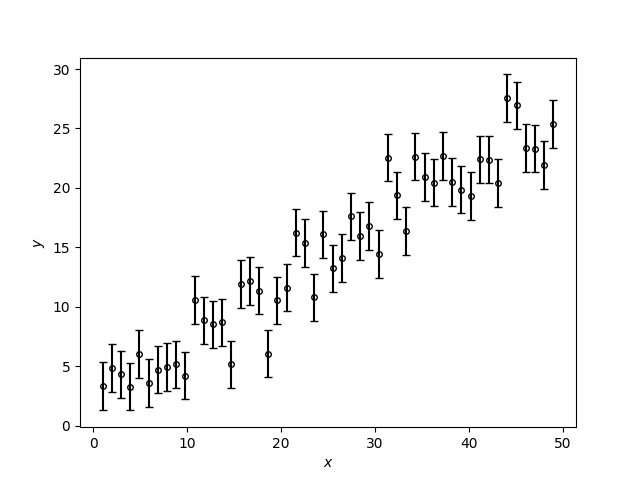

In [83]:
def gen_data(x, amplitude, mean, variance, c0, c1, c2, c3):

    # random scatter
    y_scatter = amplitude*np.random.normal(mean, np.sqrt(variance), len(x))
    
    # model
    y_model = c0 + c1*x + c2*x**2 + c3*x**3
    
    # y vals, uncertainties
    y = y_model + y_scatter
    sigma = amplitude*np.ones_like(x)
    
    return y, sigma

### generate data ###
N = 50       # number of data
amp = 2.0    # scatter amplitude
mu = 0.0     # scatter center
var = 1.0    # scatter variance
c0 = 2.0     # model coefficient, constant term
c1 = 0.5     # model coefficient, linear term
c2 = -0.0   # model coefficient, quadratic term
c3 = 0.00   # model coefficient, cubic term
xdata = np.linspace(1, N-1, N)    # x data
ydata, sigma = gen_data(xdata, amp, mu, var, c0, c1, c2, c3) # y data, uncertainties

### plot data ###
from matplotlib import pyplot as plt
%matplotlib notebook
plt.errorbar(xdata, ydata, yerr=sigma, \
             fmt='ko', markerfacecolor='none', markersize=4, \
             ecolor='k', capthick=1, capsize=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

a1 = 2.26987549965 +/- 0.574634012538
a2 = 0.484115511073 +/- 0.0200081682666
chi-squared = 59.936735
N - p = 46.000000


<IPython.core.display.Javascript object>


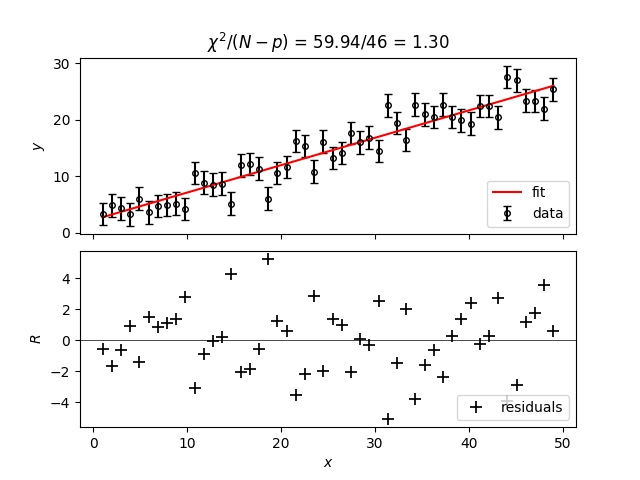

In [84]:
### apply linear fit ###
a_fit, sig_a, y_fit, res, chisq = linfit(xdata, ydata, sigma)
print('a1 =', a_fit[0], '+/-', sig_a[0])
print('a2 =', a_fit[1], '+/-', sig_a[1])
print("chi-squared = %f" % (chisq))
print("N - p = %f" % (N-p))

### reconstruct the model at arbitrary points ###
xeval = np.linspace(1, N-1, 100)
yeval = a_fit[0] + a_fit[1]*xeval
    
### plot the results ###
from matplotlib import pyplot as plt
%matplotlib notebook

# create fig, axes
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)

# plot data and best fit line
ax1.errorbar(xdata, ydata, yerr=sigma, \
             fmt='ko', markersize=4, markeredgewidth=1, markerfacecolor='none', \
             ecolor='k', capthick=1, capsize=3, label='data')
ax1.plot(xeval, yeval, 'r-', label='fit')
ax1.set_ylabel(r"$y$")
ax1.set_title(r"$\chi^2/(N-p)$ = %2.2f/%d = %2.2f" % (chisq, N-p, chisq/(N-p)))
ax1.legend(loc="lower right", numpoints=1)

# plot residuals
ax2.plot(xdata, res, 'k+', markersize=8, markeredgewidth=1.25, label='residuals')
ax2.axhline(0, color='k', lw=0.5)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$R$")
ax2.legend(loc="lower right", numpoints=1)

fig.show()

## 2. Multiple linear regression: least squares fitting to a polynomial

Instead of fitting the data to a line, $Y(x;\{a_{0}, a_{1}\}) = a_{0} + a_{1}x$, we can use the more general hypothesis

\begin{equation*}
  Y(x;\{a_{j}\}) = \sum_{j=0}^{p}a_{j}Y_{j}(x)
  = a_{0}Y_{0}(x) + \cdots + a_{p}Y_{p}(x),
\end{equation*}

where $a_{0},\ldots,a_{p}$ are the free parameters of the fit, and the $Y_{j}$'s are arbitrary functions of $x$. The only restriction is that the $Y_{j}$'s do not depend on the $a_{j}$'s, so that the resulting system of equations are linear in $a_{0},\ldots,a_{p}$. This is called **multiple linear regression**, because there are now $p+1$ **regressors**, $Y_{0}(x),\ldots,Y_{p}(x)$. The above results are easily generalized to this case with only slight modification.

As before, we define the **residual** at each point

\begin{equation*}
  R_{i}(\{a_{j}\}) = Y(x_{i};\{a_{j}\}) - y_{i},
\end{equation*}

and the **chi-squared** function

\begin{equation*}
  \chi^2(\{a_{j}\})
  = \sum_{i=0}^{N-1}\left(\frac{R_{i}}{\sigma_{i}}\right)^2
  = \sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}\left[Y(x_{i};\{a_{j}\}) - y_{i}\right]^2
  = \sum_{i=0}^{N-1}\frac{1}{\sigma_{i}^2}\left(\sum_{k=0}^{p}a_{k}Y_{k}(x_{i}) - y_{i}\right)^2.
\end{equation*}

As in the case of linear regression, we seek values of the parameters $a_{0},\ldots,a_{p}$ which minimize the chi-squared function. This gives

\begin{equation*}
  \frac{\partial}{\partial a_{j}}\chi^2 
  = 2\left[\sum_{i=0}^{N-1}\frac{Y_{j}(x_{i})}{\sigma_{i}^2}
  \left(\sum_{k=0}^{p}a_{k}Y_{k}(x_{i}) - y_{i}\right)\right]
  = 0
  \quad,\quad j=0,\ldots,p
\end{equation*}

which then yield the **normal equations**

\begin{equation*}
  \sum_{i=0}^{N-1}\sum_{k=0}^{p}\frac{Y_{j}(x_{i})Y_{k}(x_{i})}{\sigma_{i}^2}a_{k}
  = \sum_{i=0}^{N-1}y_{i}\frac{Y_{j}(x_{i})}{\sigma_{i}^2}
  \quad,\quad j=0,\ldots,p.
\end{equation*}

Solving this system of $p+1$ linear equations yields the optimal values for the parameters $a_{0},\ldots,a_{p}$.

### Matrix form

Due to the linearity in the $a_{j}$'s, the above normal equations can be expressed in matrix form as

\begin{equation*}
  \mathbf{M}\mathbf{a} 
  = \mathbf{b},
\end{equation*}

where

\begin{equation*}
  \mathbf{M}
  = \left[\begin{array}{cccc}
  \sum\frac{Y_{0}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{0}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\ 
  \sum\frac{Y_{1}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{1}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{1}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \sum\frac{Y_{p}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{p}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{p}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\
  \end{array}\right]
  \quad,\quad
  \mathbf{a}
  = \left[\begin{array}{c}
  a_{0} \\
  a_{1} \\
  \vdots \\
  a_{p}  
  \end{array}\right]
  \quad,\quad
  \mathbf{b}
  = \left[\begin{array}{c}
  \sum y_{i}\frac{Y_{0}(x_{i})}{\sigma_{i}^2} \\
  \sum y_{i}\frac{Y_{1}(x_{i})}{\sigma_{i}^2} \\
  \vdots \\
  \sum y_{i}\frac{Y_{p}(x_{i})}{\sigma_{i}^2} 
  \end{array}\right].
\end{equation*}

Note that $\mathbf{M}$ is a $(p+1)\times(p+1)$ square matrix. The solution is found by inverting the matrix equation

\begin{equation*}
  \mathbf{a} 
  = \mathbf{M}^{-1}\mathbf{b},
\end{equation*}

where

\begin{equation*}
  \mathbf{M}^{-1}
  = \frac{\text{cof}\left(\mathbf{M}^\mathrm{T}\right)}{\Delta},
\end{equation*}

Alternatively, using Cramer's rule

\begin{equation*}
  a_{j} = \frac{\left|\mathbf{M}_{j}\right|}{\Delta}
\end{equation*}

where $\Delta$ is the determinant of $\mathbf{M}$, and $\left|\mathbf{M}_{j}\right|$ is the determinant of the matrix obtained by replacing the $j$th column of $\mathbf{M}$ by the vector $\mathbf{b}$. Writing this out explicitly

\begin{align*}
  a_{0} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum y_{i}\frac{Y_{0}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{0}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\ 
  \sum y_{i}\frac{Y_{1}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{1}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{1}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \sum y_{i}\frac{Y_{p}(x_{i})}{\sigma_{i}^2} & \sum\frac{Y_{p}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{p}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2}
  \end{array}\right| \\
  \\
  a_{1} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum\frac{Y_{0}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum y_{i}\frac{Y_{0}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum\frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\ 
  \sum\frac{Y_{1}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum y_{i}\frac{Y_{1}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum\frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\ 
  \vdots & \vdots & \ddots & \vdots \\
  \sum\frac{Y_{p}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum y_{i}\frac{Y_{p}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum\frac{Y_{p}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2}
  \end{array}\right| \\
  \\
  & \quad\quad
  \cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!
  \cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots\!\cdots \\
  \\
  a_{p} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum\frac{Y_{0}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum\frac{Y_{0}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum y_{i}\frac{Y_{0}(x_{i})}{\sigma_{i}^2} \\ 
  \sum\frac{Y_{1}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum\frac{Y_{1}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum y_{i}\frac{Y_{1}(x_{i})}{\sigma_{i}^2} \\ 
  \vdots & \vdots & \ddots & \vdots \\
  \sum\frac{Y_{p}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2}  & \sum\frac{Y_{p}(x_{i})Y_{1}(x_{i})}{\sigma_{i}^2}
  & \cdots & \sum y_{i}\frac{Y_{p}(x_{i})}{\sigma_{i}^2}
  \end{array}\right|
\end{align*}

where

\begin{equation*}
  \Delta = \left|\begin{array}{ccc}
  \sum\frac{Y_{0}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum \frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\ 
  \vdots & \ddots & \vdots \\
  \sum\frac{Y_{p}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum \frac{Y_{p}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} 
  \end{array}\right|
\end{equation*}

### The design matrix

Alternatively, the above normal equations may be written as

\begin{equation*}
  (\boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\alpha})\mathbf{a} 
  = \boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\beta}
\end{equation*}

where 

\begin{equation*}
  \boldsymbol{\alpha} 
  = \left[\begin{array}{cccc}
  \mathbf{\tilde{Y}}_{0} & \mathbf{\tilde{Y}}_{1} & \cdots & \mathbf{\tilde{Y}}_{p}
  \end{array}\right]
  \quad,\quad
  \mathbf{a} 
  = \left[\begin{array}{c}
  a_{0} \\
  a_{1} \\
  \vdots \\
  a_{p}  
  \end{array}\right]
  \quad,\quad
  \boldsymbol{\beta}
  = \left[\begin{array}{c}
  y_{0}/\sigma_{0} \\
  y_{1}/\sigma_{1} \\
  \vdots \\
  y_{N-1}/\sigma_{N-1} 
  \end{array}\right]
\end{equation*}

and

\begin{equation*}
  \mathbf{\tilde{Y}}_{k} 
  = \left[\begin{array}{c}
  Y_{k}(x_{0})/\sigma_{0} \\
  Y_{k}(x_{1})/\sigma_{1} \\
  \vdots \\
  Y_{k}(x_{N-1})/\sigma_{N-1}  
  \end{array}\right].
\end{equation*}

Note that $\boldsymbol{\alpha}$, called teh **design matrix**, is an $N\times(p+1)$ rectangular matrix. The design matrix does not depend on the values $y_{i}$, but only on the values $x_{i}$ and the uncertainties $\sigma_{i}$. That is, $\boldsymbol{\alpha}$ only depends on the design of the experiment, but not on the resulting measurements of that experiment. 

To get comfortable with these two alternative formulations (in terms of $\mathbf{M}$ and $\mathbf{b}$ versus $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$), it is worth verifying that they are indeed equivalent:

\begin{align*}
  \boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\alpha} 
  &= \left[\begin{array}{ccc}
  \cdots & \mathbf{\tilde{Y}}^\mathrm{T}_{0} & \cdots \\
  \cdots & \cdots & \cdots \\
  \cdots & \mathbf{\tilde{Y}}^\mathrm{T}_{p} & \cdots
  \end{array}\right]
  \left[\begin{array}{ccc}
  \vdots & \vdots & \vdots \\
  \mathbf{\tilde{Y}}_{0} & \vdots & \mathbf{\tilde{Y}}_{p} \\
  \vdots & \vdots & \vdots
  \end{array}\right]
  = \left[\begin{array}{ccc}
  \frac{Y_{0}(x_{0})}{\sigma_{0}} & \cdots & \frac{Y_{0}(x_{N-1})}{\sigma_{N-1}} \\
  \vdots & \ddots & \vdots \\
  \frac{Y_{p}(x_{0})}{\sigma_{0}} & \cdots & \frac{Y_{p}(x_{N-1})}{\sigma_{N-1}}
  \end{array}\right]
  \left[\begin{array}{ccc}
  \frac{Y_{0}(x_{0})}{\sigma_{0}} & \cdots & \frac{Y_{p}(x_{0})}{\sigma_{0}} \\
  \vdots & \ddots & \vdots \\
  \frac{Y_{0}(x_{N-1})}{\sigma_{N-1}} & \cdots & \frac{Y_{p}(x_{N-1})}{\sigma_{N-1}}
  \end{array}\right] \\
  \\
  &=
  \left[\begin{array}{ccc}
  \sum\frac{Y_{0}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{0}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2} \\
  \vdots & \ddots & \vdots \\
  \sum\frac{Y_{p}(x_{i})Y_{0}(x_{i})}{\sigma_{i}^2} 
  & \cdots & \sum\frac{Y_{p}(x_{i})Y_{p}(x_{i})}{\sigma_{i}^2}
  \end{array}\right]
  = \mathbf{M}.
\end{align*}

Also 

\begin{equation*}
  \boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\beta} 
  = \left[\begin{array}{ccc}
  \cdots & \mathbf{\tilde{Y}}^\mathrm{T}_{0} & \cdots \\
  \cdots & \cdots & \cdots \\
  \cdots & \mathbf{\tilde{Y}}^\mathrm{T}_{p} & \cdots
  \end{array}\right]
  \left[\begin{array}{c}
  \beta_{0} \\
  \vdots \\
  \beta_{N-1}
  \end{array}\right]
  = \left[\begin{array}{ccc}
  \frac{Y_{0}(x_{0})}{\sigma_{0}} & \cdots & \frac{Y_{0}(x_{N-1})}{\sigma_{N-1}} \\
  \vdots & \ddots & \vdots \\
  \frac{Y_{p}(x_{0})}{\sigma_{0}} & \cdots & \frac{Y_{p}(x_{N-1})}{\sigma_{N-1}}
  \end{array}\right]
  \left[\begin{array}{c}
  \frac{y_{0}}{\sigma_{0}} \\
  \vdots \\
  \frac{y_{N-1}}{\sigma_{N-1}} \\
  \end{array}\right]
  = \left[\begin{array}{c}
  \sum y_{i}\frac{Y_{0}(x_{i})}{\sigma_{i}^2} \\
  \vdots \\
  \sum y_{i}\frac{Y_{p}(x_{i})}{\sigma_{i}^2} 
  \end{array}\right]
  = \mathbf{b}.
\end{equation*}

Therefore this formulation in terms of the design matrix is completely equivalent to the previous matrix formulation.

### Error estimation

As before, if the data have known uncertainties, then the uncertainties in the optimized parameters are found by the usual rule for error propagation

\begin{equation*}
  \sigma_{z}^2 = \sum_{i=1}^{N}\left(\frac{\partial z}{\partial y_{i}}\right)^2\sigma_{i}^2,
\end{equation*}

which yields

\begin{equation*}
  \sigma_{a_{j}}^2 = C_{jj}
  \quad,\quad\text{where}\quad
  \mathbf{C} = \mathbf{M}^{-1} = (\boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\alpha})^{-1}
\end{equation*}

### Special case: polynomial fitting

As a special case of the above, consider a polynomial fitting function

\begin{equation*}
  Y(x;\{a_{j}\}) = \sum_{j=0}^{p}a_{j}x^{j}
  = a_{0} + a_{1}x + \cdots + a_{p}x^{p},
\end{equation*}

so that the normal equations become

\begin{equation*}
  \mathbf{M}\mathbf{a} 
  = \mathbf{b}
\end{equation*}

with 

\begin{equation*}
  \mathbf{M}
  = \left[\begin{array}{cccc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} 
  & \cdots & \sum\frac{x_{i}^{p}}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} 
  & \cdots & \sum\frac{x_{i}^{p+1}}{\sigma_{i}^2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \sum\frac{x_{i}^{p}}{\sigma_{i}^2} & \sum\frac{x_{i}^{p+1}}{\sigma_{i}^2} 
  & \cdots & \sum\frac{x_{i}^{2p}}{\sigma_{i}^2} \\
  \end{array}\right]
  \quad,\quad
  \mathbf{a}
  = \left[\begin{array}{c}
  a_{0} \\
  a_{1} \\
  \vdots \\
  a_{p}  
  \end{array}\right]
  \quad,\quad
  \mathbf{b}
  = \left[\begin{array}{c}
  \sum y_{i}\frac{1}{\sigma_{i}^2} \\
  \sum y_{i}\frac{x_{i}}{\sigma_{i}^2} \\
  \vdots \\
  \sum y_{i}\frac{x_{i}^{p}}{\sigma_{i}^2} 
  \end{array}\right].
\end{equation*}

Alternatively,

\begin{equation*}
  (\boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\alpha})\mathbf{a} 
  = \boldsymbol{\alpha}^\mathrm{T}\boldsymbol{\beta}
\end{equation*}

where 

\begin{equation*}
  \boldsymbol{\alpha} 
  = \left[\begin{array}{cccc}
  \frac{1}{\sigma_{0}} & \frac{x_{0}}{\sigma_{0}} & \cdots & \frac{x_{0}^{p}}{\sigma_{0}} \\
  \frac{1}{\sigma_{1}} & \frac{x_{1}}{\sigma_{1}} & \cdots & \frac{x_{1}^{p}}{\sigma_{1}} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{1}{\sigma_{p}} & \frac{x_{p}}{\sigma_{p}} & \cdots & \frac{x_{p}^{p}}{\sigma_{p}}
  \end{array}\right]
  \quad,\quad
  \boldsymbol{\beta}
  = \left[\begin{array}{c}
  \frac{y_{0}}{\sigma_{0}} \\
  \frac{y_{1}}{\sigma_{1}} \\
  \vdots \\
  \frac{y_{p}}{\sigma_{p}} 
  \end{array}\right]
\end{equation*}

### Example: least squares fitting to a quadratic

Consider a quadratic fitting function

\begin{equation*}
  Y(x;\{a_{j}\}) = \sum_{j=0}^{2}a_{j}x^{j}
  = a_{0} + a_{1}x + a_{2}x^2.
\end{equation*}

The normal equations become

\begin{equation*}
  \left[\begin{array}{ccc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} & \sum\frac{x_{i}^4}{\sigma_{i}^2}
  \end{array}\right]
  \left[\begin{array}{c}
  a_{0} \\
  a_{1} \\
  a_{2}  
  \end{array}\right]
  = \left[\begin{array}{c}
  \sum y_{i}\frac{1}{\sigma_{i}^2} \\
  \sum y_{i}\frac{x_{i}}{\sigma_{i}^2} \\
  \sum y_{i}\frac{x_{i}^2}{\sigma_{i}^2} 
  \end{array}\right].
\end{equation*}

The solution can be obtained using Cramer's rule

\begin{align*}
  a_{0} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum y_{i}\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} \\ 
  \sum y_{i}\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} \\
  \sum y_{i}\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} & \sum\frac{x_{i}^4}{\sigma_{i}^2}
  \end{array}\right| \\
  \\
  a_{1} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum\frac{1}{\sigma_{i}^2} & \sum y_{i}\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum y_{i}\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} \\
  \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum y_{i}\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^4}{\sigma_{i}^2}
  \end{array}\right| \\
  \\
  a_{2} &= \frac{1}{\Delta}
  \left|\begin{array}{cccc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2} & \sum y_{i}\frac{1}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum y_{i}\frac{x_{i}}{\sigma_{i}^2} \\
  \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2} & \sum y_{i}\frac{x_{i}^2}{\sigma_{i}^2}
  \end{array}\right|
\end{align*}

where

\begin{equation*}
  \Delta = \left|\begin{array}{ccc}
  \sum\frac{1}{\sigma_{i}^2} & \sum\frac{x_{i}}{\sigma_{i}^2}& \sum \frac{x_{i}^2}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}}{\sigma_{i}^2} & \sum\frac{x_{i}^2}{\sigma_{i}^2}& \sum \frac{x_{i}^3}{\sigma_{i}^2} \\ 
  \sum\frac{x_{i}^2}{\sigma_{i}^2} & \sum\frac{x_{i}^3}{\sigma_{i}^2}& \sum \frac{x_{i}^4}{\sigma_{i}^2}
  \end{array}\right|
\end{equation*}

### CODE: least squares fit to a polynomial

In [85]:
import numpy as np
import scipy.linalg as la

### least squares fit to a polynomial ###
def polyfit(xdata, ydata, sigma, p):
    """
    Least squares fit of data to a polynomial
    
    INPUT:
    xdata = array of x data (independent variable) 
    ydata = array of y data (dependent variable)
    sigma = array of uncertainties, or error bars, in the y values
    p = degree of polynomial to fit

    OUTPUT:
    a_fit = array of best fit parameters
    sig_a = array of uncertainties in the best fit parameters 
    y_fit = best fit values at xdata positions
    res = residuals of the best fit
    chisq = chi-squared for the best fit
    """
    # construct design matrix
    alpha = np.zeros((len(xdata), p+1))
    for j in range(0, p+1):
        alpha[:,j] = xdata**j/sigma
        
    # construct RHS vector
    beta = ydata/sigma
    rhs = np.dot(alpha.T, beta)
    
    # construct LHS matrix
    lhs = np.dot(alpha.T, alpha)
    
    # calculate the correlation matrix elements
    C = la.inv(lhs)    

    # calculate best fit parameters
    a_fit = la.solve(lhs, rhs)

    # calculate error in best fit parameters
    sig_a = np.zeros(p+1)
    for j in range(0, p+1):
        sig_a[j] = np.sqrt(C[j,j])

    # evaluate curve fit at each x value
    y_fit = np.zeros_like(xdata)
    for j in range(0, p+1):
        y_fit = y_fit + a_fit[j]*xdata**j

    # calculate residuals
    res = y_fit - ydata

    # calculate chi-squared
    chisq = sum(res**2/sigma**2)
    
    return a_fit, sig_a, y_fit, res, chisq

### Test: least squares fit to a polynomial

<IPython.core.display.Javascript object>


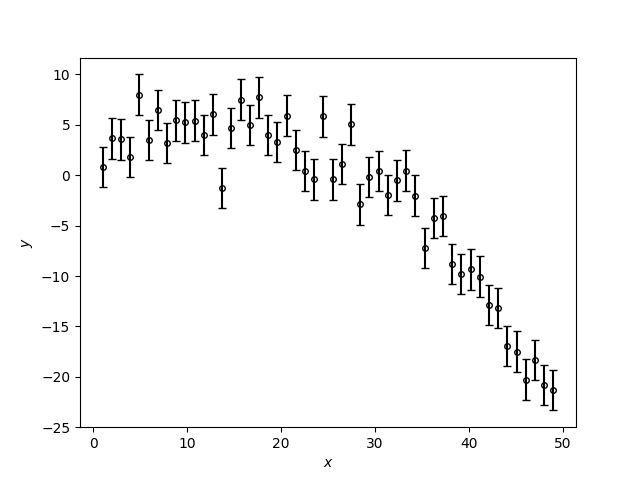

In [88]:
def gen_data(x, amplitude, mean, variance, c0, c1, c2, c3):

    # random scatter
    y_scatter = amplitude*np.random.normal(mean, np.sqrt(variance), len(x))
    
    # model
    y_model = c0 + c1*x + c2*x**2 + c3*x**3
    
    # y vals, uncertainties
    y = y_model + y_scatter
    sigma = amplitude*np.ones_like(x)
    
    return y, sigma

### generate data ###
N = 50       # number of data
amp = 2.0    # scatter amplitude
mu = 0.0     # scatter center
var = 1.0    # scatter variance
c0 = 2.0     # model coefficient, constant term
c1 = 0.5     # model coefficient, linear term
c2 = -0.02   # model coefficient, quadratic term
c3 = 0.00   # model coefficient, cubic term
xdata = np.linspace(1, N-1, N)    # x data
ydata, sigma = gen_data(xdata, amp, mu, var, c0, c1, c2, c3) # y data, uncertainties

### plot data ###
from matplotlib import pyplot as plt
%matplotlib notebook
plt.errorbar(xdata, ydata, yerr=sigma, \
             fmt='ko', markerfacecolor='none', markersize=4, \
             ecolor='k', capthick=1, capsize=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

a0 = 1.435603 +/- 0.885097
a1 = 0.576092 +/- 0.081658
a2 = -0.021488 +/- 0.001583
chi-squared = 54.389339
N - p = 48.000000


<IPython.core.display.Javascript object>


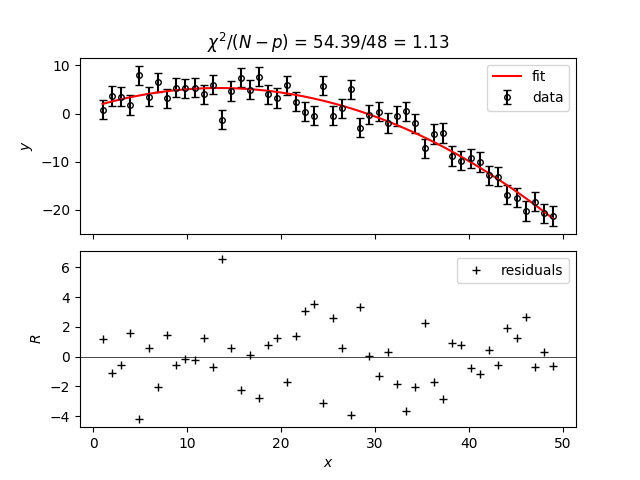

In [91]:
### apply polynomial fit ###
p = 2
a_fit, sig_a, y_fit, res, chisq = polyfit(xdata, ydata, sigma, p)
for i in range(0, p+1):
    print("a%d = %f +/- %f" % (i, a_fit[i], sig_a[i]))
print("chi-squared = %f" % (chisq))
print("N - p = %f" % (N-p))

### reconstruct the model at arbitrary points ###
xeval = np.linspace(1, N-1, 100)
yeval = np.zeros_like(xeval)
for j in range(0,p+1):
    yeval = yeval + a_fit[j]*xeval**j
    
### plot the results ###
from matplotlib import pyplot as plt
%matplotlib notebook

# create fig, axes
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)

# plot data and best fit curve
ax1.errorbar(xdata, ydata, yerr=sigma, \
             fmt='ko', markerfacecolor='none', markersize=4, \
             ecolor='k', capthick=1, capsize=3, label='data')
ax1.plot(xeval, yeval, 'r-', label='fit')
ax1.set_ylabel(r"$y$")
ax1.set_title(r"$\chi^2/(N-p)$ = %2.2f/%d = %2.2f" % (chisq, N-p, chisq/(N-p)))
ax1.legend(loc="upper right")

# plot residuals
ax2.plot(xdata, res, 'k+', label='residuals')
ax2.axhline(0, color='k', lw=0.5)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$R$")
ax2.legend(loc="upper right")

fig.show()